In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r2/title_r2_10k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 10000 drug-target pairs
encoding drug...
unique drugs: 9571
encoding protein...
unique target sequence: 1409
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 51.1151. Total time 0.00027 hours
Validation at Epoch 1 with loss:2.40573, MSE: 2.35143 , Pearson Correlation: 0.14487 with p-value: 4.23E-06 , Concordance Index: 0.53459
Training at Epoch 2 iteration 0 with loss 2.36753. Total time 0.0075 hours
Validation at Epoch 2 with loss:2.24633, MSE: 2.35771 , Pearson Correlation: 0.21703 with p-value: 3.99E-12 , Concordance Index: 0.55986
Training at Epoch 3 iteration 0 with loss 2.33053. Total time 0.0175 hours
Validation at Epoch 3 with loss:2.55210, MSE: 2.38773 , Pearson Correlation: 0.28084 with p-value: 1.39E-19 , Concordance Index: 0.58182
Training at Epoch 4 iteration 0 with loss 2.07193. Total time 0.02888 hours
Validation at Epoch 4 with loss:2.06361, MSE: 2.31856 , Pearson Correlation: 0.32061 with p-value: 2.43E-25 , Concordance Index: 0.59547
Training at Epoch 5 iteration 0 with loss 2.43680. Total time 0.04027 hours
Validati

Training at Epoch 39 iteration 0 with loss 0.47536. Total time 0.39611 hours
Validation at Epoch 39 with loss:1.72527, MSE: 1.83168 , Pearson Correlation: 0.53643 with p-value: 1.35E-75 , Concordance Index: 0.68071
Training at Epoch 40 iteration 0 with loss 0.35470. Total time 0.405 hours
Validation at Epoch 40 with loss:1.68678, MSE: 1.84678 , Pearson Correlation: 0.52982 with p-value: 1.87E-73 , Concordance Index: 0.67809
Training at Epoch 41 iteration 0 with loss 0.31379. Total time 0.41388 hours
Validation at Epoch 41 with loss:1.85508, MSE: 1.90669 , Pearson Correlation: 0.53578 with p-value: 2.21E-75 , Concordance Index: 0.67953
Training at Epoch 42 iteration 0 with loss 0.35203. Total time 0.4225 hours
Validation at Epoch 42 with loss:1.90353, MSE: 1.89710 , Pearson Correlation: 0.53317 with p-value: 1.56E-74 , Concordance Index: 0.67904
Training at Epoch 43 iteration 0 with loss 0.36381. Total time 0.43138 hours
Validation at Epoch 43 with loss:2.08348, MSE: 2.05844 , Pearson C

Validation at Epoch 77 with loss:2.19883, MSE: 2.07910 , Pearson Correlation: 0.50605 with p-value: 3.83E-66 , Concordance Index: 0.67080
Training at Epoch 78 iteration 0 with loss 0.16613. Total time 0.67361 hours
Validation at Epoch 78 with loss:2.35728, MSE: 2.01733 , Pearson Correlation: 0.50995 with p-value: 2.66E-67 , Concordance Index: 0.67224
Training at Epoch 79 iteration 0 with loss 0.15821. Total time 0.68027 hours
Validation at Epoch 79 with loss:1.73867, MSE: 1.99716 , Pearson Correlation: 0.51477 with p-value: 9.32E-69 , Concordance Index: 0.67374
Training at Epoch 80 iteration 0 with loss 0.15849. Total time 0.68694 hours
Validation at Epoch 80 with loss:2.26225, MSE: 2.11443 , Pearson Correlation: 0.50345 with p-value: 2.23E-65 , Concordance Index: 0.66845
Training at Epoch 81 iteration 0 with loss 0.19170. Total time 0.69388 hours
Validation at Epoch 81 with loss:2.11731, MSE: 2.00246 , Pearson Correlation: 0.50057 with p-value: 1.55E-64 , Concordance Index: 0.66764
Tr

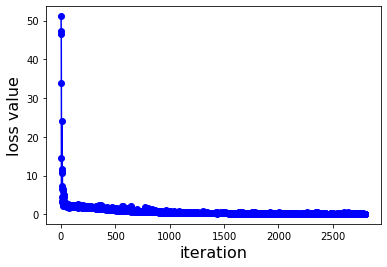

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r2/model_r2_10k_100epochs')